In [1]:
import numpy as np
import scipy.optimize
import scipy.special
import itertools
import networkx as nx
import matplotlib.pyplot as plt

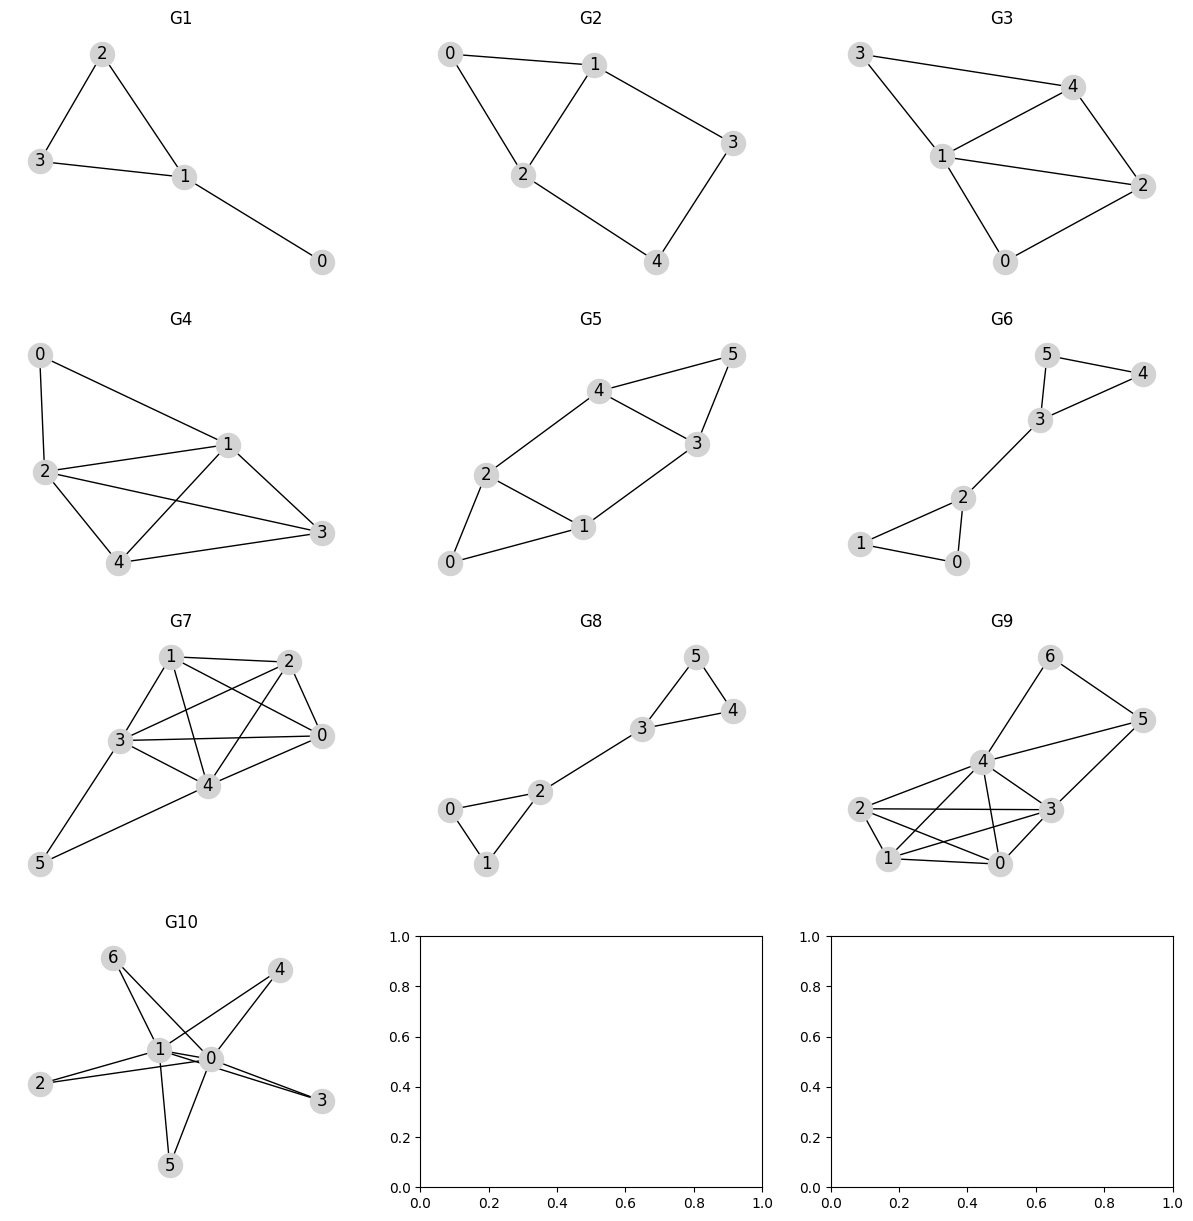

In [2]:
# Stop sign graph
G1 = nx.Graph(incoming_graph_data=[
    (0,1),
    (1,2), (1,3),
    (2,3)
])


# House graph
G2 = nx.Graph(incoming_graph_data=np.array([
 [0,1,1,0,0],
 [1,0,1,1,0],
 [1,1,0,0,1],
 [0,1,0,0,1],
 [0,0,1,1,0]
]))

# Full-House graph
G3 = nx.Graph(incoming_graph_data=[
    (0,1), (0,2),
    (1,2), (1,3),(1,4),
    (2,4), 
    (3,4)
])

# Full-House graph
G4 = nx.Graph(incoming_graph_data=[
    (0,1), (0,2),
    (1,2), (1,3),(1,4),
    (2,4), (2,3),
    (3,4)
])

#
G5 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),(1,3),
    (2,4),
    (3,4),(3,5),
    (4,5)
])

#
G6 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),
    (2,3),
    (3,4),(3,5),
    (4,5)
])

#
G7 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),(0,3),(0,4),
    (1,2),(1,3),(1,4),
    (2,3),(2,4),
    (3,4),(3,5),
    (4,5)
])

#
G8 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),
    (2,3),
    (3,4),(3,5),
    (4,5)
])

#
G9 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),(0,3),(0,4),
    (1,2),(1,3),(1,4),
    (2,3),(2,4),
    (3,4),(3,5),
    (4,5),(4,6),
    (5,6)
])

#
G10 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),(0,3),(0,4),(0,5),(0,6),
    (1,2),(1,3),(1,4),(1,5),(1,6)
])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize = (15,15))
ax = axes.flatten()
graphs = [G1,G2,G3,G4,G5,G6,G7,G8,G9,G10]


for i in range(len(graphs)):
    nx.draw_networkx(graphs[i], node_color = "lightgray", ax=ax[i])
    ax[i].set_axis_off()
    ax[i].title.set_text("G"+str(i+1))

plt.show()

In [70]:
def covering_random_walk(P):
    n = len(P)
    s = 0
    discovered = [s]
    states = [s]
    discovered_by = [None]
    while (len(discovered)<n):
        next_s = np.random.choice(n, p = P[s])
        states.append(next_s)
        if not(next_s in discovered):
            discovered.append(next_s)
            discovered_by.append(s)
        s = next_s
    return states, discovered, discovered_by

def transition_matrix_uniform(G):
    A = nx.convert_matrix.to_numpy_array(G)
    P = (A.T/ A.sum(axis=0)).T
    return P

def transition_matrix_adapted(G):
    degrees = [d for (_,d) in G.degree]
    P = np.outer(degrees,degrees)
    A = nx.convert_matrix.to_numpy_array(G)
    P = A*P
    P = (P.T/ P.sum(axis=0)).T
    return(P)
    
def sample_spanning_tree(G,P):
    _ , discovered, discovered_by = covering_random_walk(P)
    return [(discovered[i],discovered_by[i]) for i in range(1, len(discovered))]

def sample_spanning_tree2(G,P):
    """returns indices of edges"""
    _ , discovered, discovered_by = covering_random_walk(P)
    subset_of_edges = [(discovered[i],discovered_by[i]) for i in range(1, len(discovered))]
    subset_of_ordered_edges = [(min(a,b),max(a,b)) for a,b in subset_of_edges]
    print(subset_of_edges)
    edges = list(G.edges)
    indices_of_edges = [edges.index(e) for e in subset_of_ordered_edges]
    return np.sort(indices_of_edges)

def MC_edge_probability(G,P,K=1000):
    count = np.zeros(shape =(G.size()))
    for k in range(K):
        indices = sample_spanning_tree2(G,P)
        for i in indices:
            count[i]+=1
    return count/K

In [71]:
G = G6
# P1 = transition_matrix(G)
P = transition_matrix_adapted(G)
# covering_random_walk(P)
MC_edge_probability(G,P)

[(2, 0), (3, 2), (4, 3), (5, 3), (1, 2)]
[(2, 0), (1, 2), (3, 2), (5, 3), (4, 5)]
[(1, 0), (2, 1), (3, 2), (4, 3), (5, 3)]
[(2, 0), (1, 2), (3, 2), (4, 3), (5, 4)]
[(2, 0), (3, 2), (4, 3), (1, 0), (5, 3)]
[(2, 0), (1, 0), (3, 2), (5, 3), (4, 5)]
[(1, 0), (2, 1), (3, 2), (4, 3), (5, 4)]
[(1, 0), (2, 0), (3, 2), (5, 3), (4, 3)]
[(1, 0), (2, 1), (3, 2), (5, 3), (4, 5)]
[(1, 0), (2, 1), (3, 2), (5, 3), (4, 5)]
[(2, 0), (1, 2), (3, 2), (4, 3), (5, 4)]
[(2, 0), (3, 2), (1, 2), (5, 3), (4, 5)]
[(1, 0), (2, 0), (3, 2), (4, 3), (5, 4)]
[(2, 0), (1, 0), (3, 2), (5, 3), (4, 3)]
[(2, 0), (1, 2), (3, 2), (4, 3), (5, 3)]
[(1, 0), (2, 1), (3, 2), (4, 3), (5, 4)]
[(1, 0), (2, 0), (3, 2), (5, 3), (4, 5)]
[(1, 0), (2, 1), (3, 2), (5, 3), (4, 5)]
[(1, 0), (2, 1), (3, 2), (4, 3), (5, 3)]
[(1, 0), (2, 1), (3, 2), (5, 3), (4, 3)]
[(2, 0), (3, 2), (5, 3), (1, 2), (4, 5)]
[(1, 0), (2, 1), (3, 2), (5, 3), (4, 5)]
[(1, 0), (2, 1), (3, 2), (4, 3), (5, 3)]
[(2, 0), (3, 2), (5, 3), (4, 3), (1, 0)]
[(2, 0), (1, 2),

array([0.585, 0.724, 0.691, 1.   , 0.732, 0.701, 0.567])

In [30]:
weights_uniform = [MC_edge_probability(G,transition_matrix_uniform(G)) for G in graphs]
weights_adapted = [MC_edge_probability(G,transition_matrix_adapted(G)) for G in graphs]

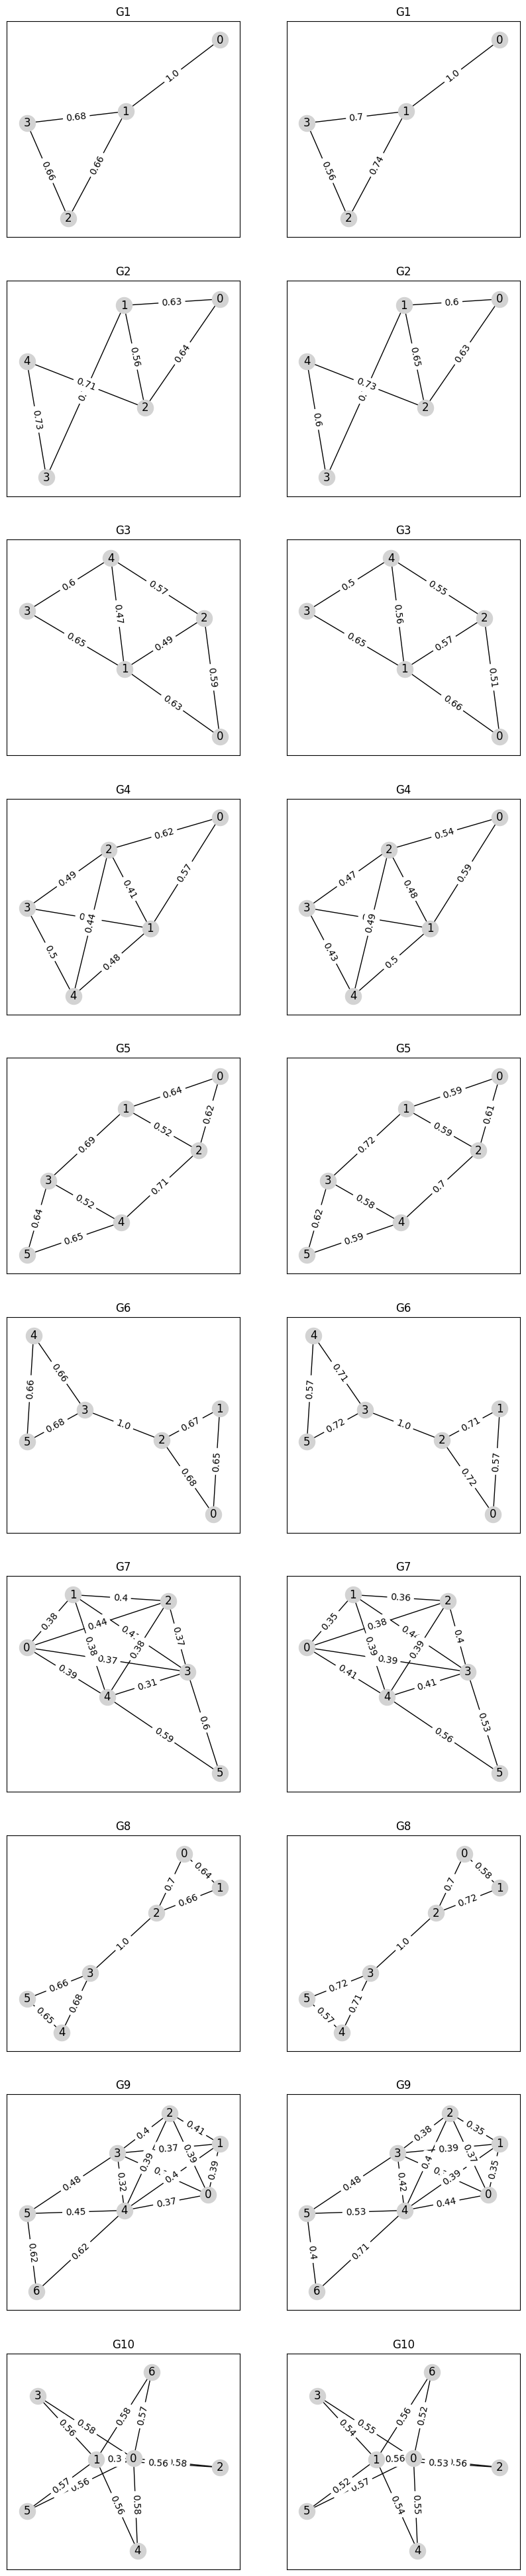

In [31]:
fig, axes = plt.subplots(nrows=len(graphs), ncols=2, figsize = (10,5*len(graphs)))
ax = axes.flatten()

for i in range(len(graphs)):
    pos = nx.spring_layout(graphs[i])
    nx.draw_networkx(graphs[i],pos = pos, node_color = "lightgray", ax=ax[2*i])
    labels = {list(graphs[i].edges)[j]: np.round(weights_uniform[i][j], decimals = 2) for j in range(graphs[i].size())}
    nx.draw_networkx_edge_labels(graphs[i],pos,edge_labels=labels, ax=ax[2*i])
    ax[2*i].title.set_text("G"+str(i+1))
    
    nx.draw_networkx(graphs[i],pos = pos, node_color = "lightgray", ax=ax[2*i+1])
    labels = {list(graphs[i].edges)[j]: np.round(weights_adapted[i][j], decimals = 2) for j in range(graphs[i].size())}
    nx.draw_networkx_edge_labels(graphs[i],pos,edge_labels=labels, ax=ax[2*i+1])
    ax[2*i+1].title.set_text("G"+str(i+1))

plt.show()